# 01. Importing libraries

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 02. Importing data

In [4]:
path = r'/Users/user/Documents/Data analysis/E6 Dashboards/Data'

In [6]:
datalis = pd.read_csv(os.path.join(path, 'Cleaned data', 'listings_rev.csv'))

# 03. Selecting variables

In [8]:
#Subset for home
home = datalis[datalis['room_type'] == 'Entire home/apt']

In [10]:
# Less than 500e per night
home_5 = home[home['price'] < 500]

In [12]:
# Less than 1000e per night
home_10 = home[home['price'] < 1000]

# 04. Scatterplots

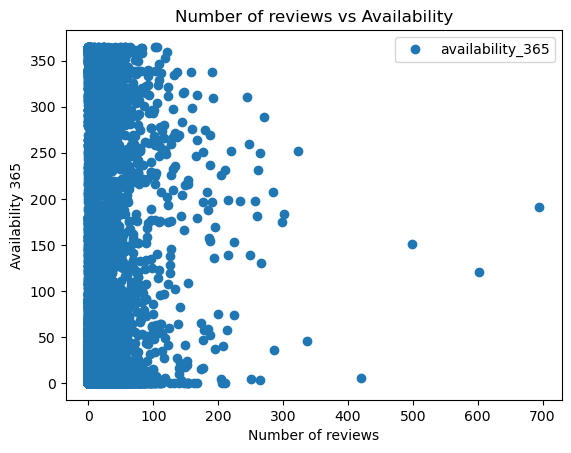

In [15]:
# Create a scatterplot using matplotlib for smaller dataset.

home_5.plot(x = 'number_of_reviews', y = 'availability_365',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of reviews vs Availability')  
plt.xlabel('Number of reviews')  
plt.ylabel('Availability 365')  
plt.show()

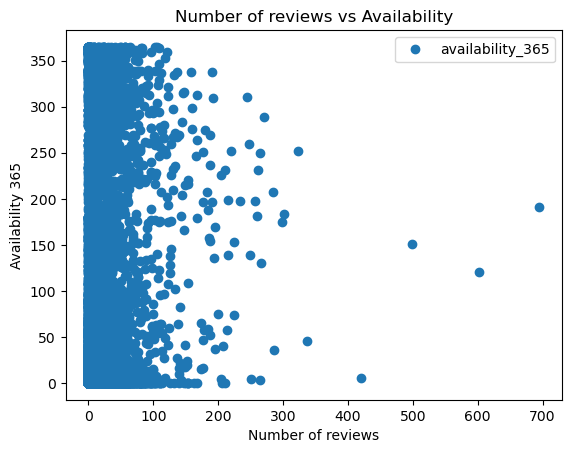

In [17]:
# Create a scatterplot using matplotlib for larger dataset.

home_10.plot(x = 'number_of_reviews', y = 'availability_365',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of reviews vs Availability')  
plt.xlabel('Number of reviews')  
plt.ylabel('Availability 365')  
plt.show()

I don't see much differnce, so I will keep the larger dataset. However, I would like to test whether the regression would perform better if I removed extreeme values (more than 400 reviews).

In [22]:
# Limited reviews
home_10_l = home_10[home_10['number_of_reviews'] < 400]

# 05. Hypothesis

I hypothesise that if property is available to rent for more days out of the year, that property will have a higher number of reviews. I also expect that the model will fit better the smaller dataset, where I excluded properties that have more than 400 reviews.

# 06. Reshaping variables into NumPy arrays

In [28]:
# The main dataset
X = home_10['availability_365'].values.reshape(-1,1)
y = home_10['number_of_reviews'].values.reshape(-1,1)

In [30]:
# The smaller dataset without outliers
X1 = home_10_l['availability_365'].values.reshape(-1,1)
y1 = home_10_l['number_of_reviews'].values.reshape(-1,1)

# 07. Splitting data into training and testing sets

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [36]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

# 08. Fitting the model to the training set

In [39]:
regression = LinearRegression()

In [41]:
regression.fit(X_train, y_train)

LinearRegression()

In [43]:
regression1 = LinearRegression()

In [45]:
regression1.fit(X1_train, y1_train)

LinearRegression()

# 08. Creating a prediction for y on the test set

In [48]:
y_predicted = regression.predict(X_test)

In [50]:
y1_predicted = regression.predict(X1_test)

# 09. Create a plot that shows the regression line on the test set

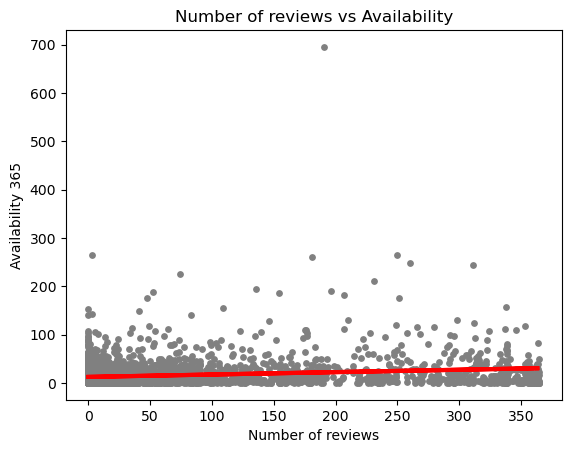

In [53]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of reviews vs Availability')
plot_test.xlabel('Number of reviews')
plot_test.ylabel('Availability 365')
plot_test.show()

# 10. Innitial assessment

By the looks the line is close to being horisontal and although it looks like it fits ok for properties that are available for less than 100 days a year, overall it does not look like a good fit.

# 11. Model performance statistics

In [55]:
# Print the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.04941152]]
Mean squared error:  511.8487457508966
R2 score:  0.03162155705940628


In [57]:
rmse_1 = mean_squared_error(y1_test, y1_predicted) # This is the mean squared error
r2_1 = r2_score(y1_test, y1_predicted) # This is the R2 score.
print('Slope:' ,regression1.coef_)
print('Mean squared error: ', rmse_1)
print('R2 score: ', r2_1)

Slope: [[0.04600003]]
Mean squared error:  472.43460447804455
R2 score:  0.043130332874893096


# 12. Comparing the predicted y values with the actual y values in a dataframe

In [67]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
df.head(20)

,Actual,Predicted
0,4,12.436250
1,16,14.116242
2,0,12.436250
3,17,12.436250
4,2,18.464456
5,14,12.436250
6,31,14.610357
7,2,12.436250
8,107,28.445583
9,7,12.436250


In [69]:
df1 = pd.DataFrame({'Actual': y1_test.flatten(), 'Predicted': y1_predicted.flatten()})
df1.head(20)

,Actual,Predicted
0,19,29.631460
1,49,12.436250
2,3,14.906826
3,10,14.610357
4,9,12.436250
5,12,12.436250
6,2,12.436250
7,0,12.436250
8,34,21.972674
9,8,12.436250


# 13. Final thoughts

This model is very inacurate. Although limiting the number of reviews (less than 400) had a minuscule positive effect on the accuracy, overall this is completely useless. It might work if I divide properties into those that are available for more than 100 days a year, and those which are not, but I am not sure if it would make much of a difference. I hope adding more variables to the model might increase accuracy. Maybe I should really split data into expensive/cheap neighbourhoods, properties that are available most of the time/only occasionally and then run separate regressions. Maybe there would be more consistency in shared room types of rental? But I'm afraid